In [14]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl

from neural_processes.data import gaussian_process as gp
from neural_processes import attention, base, decoders, encoders, models

plt.style.use("seaborn")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
def plot_test(net, random_kernel_parameters, with_samples=True):
    test = gp.torch.CurveGenerator(
        batch_size=1,
        max_num_context=20,
        random_kernel_parameters=random_kernel_parameters,
        testing=True
    ).generate_batch()
    
    context_x, context_y, target_x, target_y = test

    num_samples = 100
    
    mean_mu = net.forward(context_x, context_y, target_x, use_mean_latent=True)
    sample_mus = [
        net.forward(context_x, context_y, target_x, use_mean_latent=False)
        for _ in range(num_samples)
    ]
    # If we're outputting sigma and mu, just take mu
    if len(mean_mu) == 2:
        mean_mu, mean_sigma = mean_mu
        sample_mus = [sample[0] for sample in sample_mus]
        mean_sigma = mean_sigma.squeeze().detach()
        mean_mu = mean_mu.squeeze().detach()
        plt.fill_between(target_x.squeeze(), mean_mu - mean_sigma, mean_mu + mean_sigma, color="tab:purple", label="output std", alpha=0.2)
    else:
        mean_mu = mean_mu.squeeze().detach()

    context_x = context_x.squeeze()
    context_y = context_y.squeeze()
    target_x = target_x.squeeze()
    target_y = target_y.squeeze()

    plt.scatter(target_x, target_y, s=10, color="grey", label="target", alpha=0.5)
    plt.scatter(context_x, context_y, s=20, color="tab:red", label="context")

    plt.plot(target_x, mean_mu, linestyle="--", color="tab:blue", label="output mean")
    if with_samples:
        for mu in sample_mus:
            plt.plot(target_x, mu.squeeze().detach(), linestyle="--", color="tab:blue", alpha=0.1)
    plt.plot(target_x, mean_mu, linestyle="--", color="tab:blue", label="output mean")
    plt.legend()
    plt.show()

# Randomized kernel parameters
Could also easily do the fixed case and just half the hidden dimensions here.

In [16]:
latent_dim = 128
latent_encoder = encoders.Latent(
    encoder_net=base.MLP(input_size=2, output_sizes=[128, 128, 128]),
    latent_params_net=base.MLP(input_size=128, output_sizes=[128, 2 * latent_dim]),
)

deterministic_encoder = encoders.Deterministic(
    input_size=2,
    output_sizes=[128, 128, 128],
    attention=attention.Multihead(
        key_mlp=base.MLP(input_size=1, output_sizes=[128, latent_dim]),
        representation_size=128,
        num_heads=4,
    ),
)

decoder = decoders.Decoder(input_size=latent_dim * 2 + 1, output_sizes=[128, 128, 1])

train_loader = gp.torch.CurveGenerator(
    batch_size=16,
    max_num_context=20, 
    random_kernel_parameters=True,
    testing=False,
)

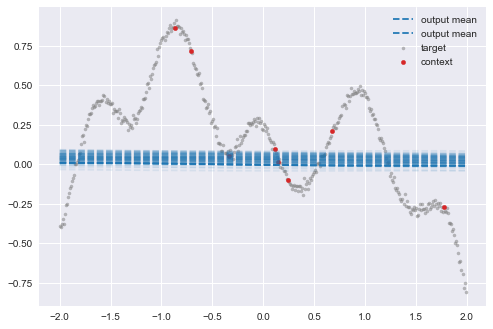

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

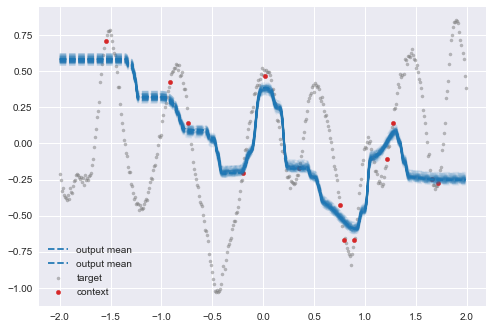

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

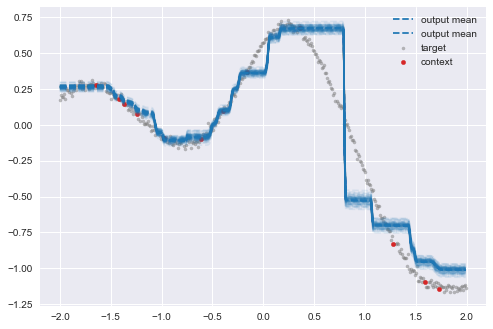

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

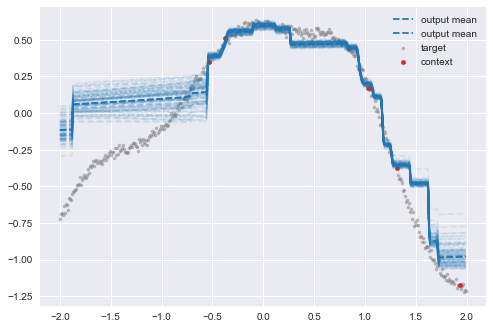

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

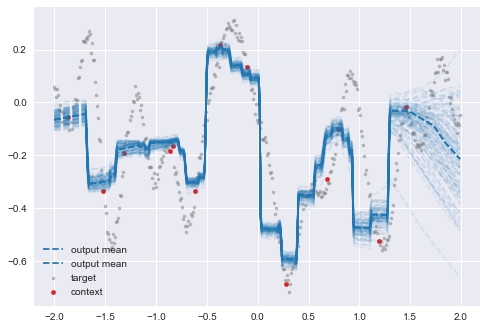

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

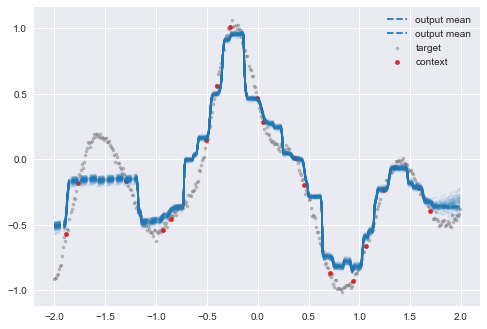

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

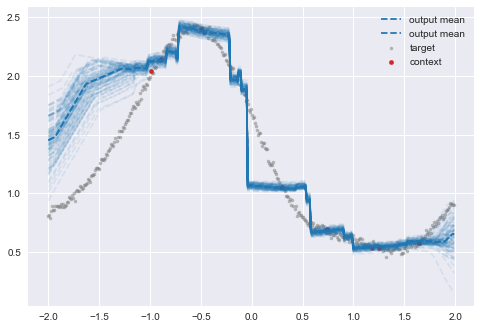

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

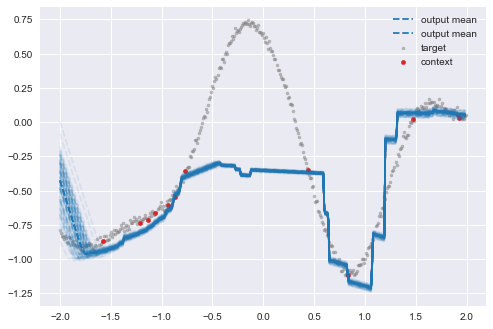

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

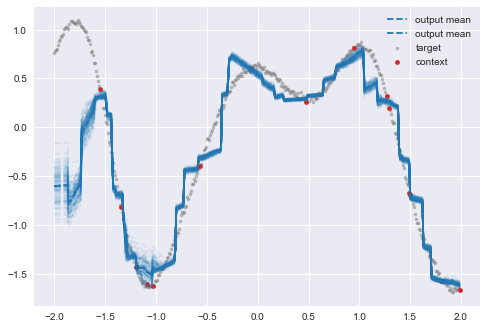

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

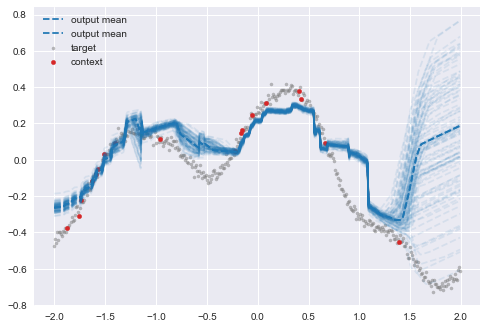

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

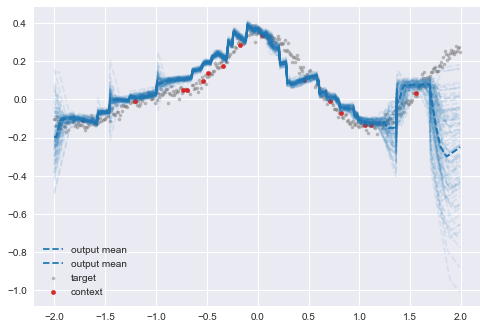

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

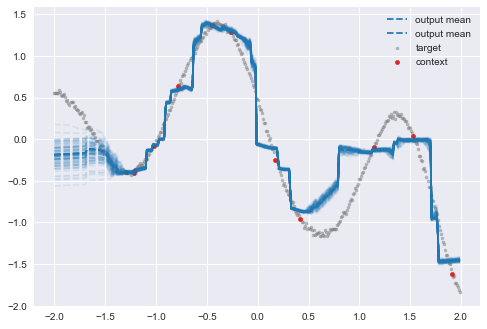

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

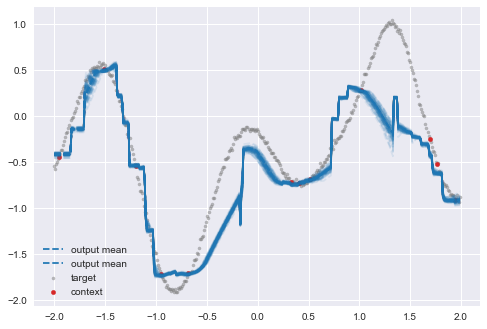

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

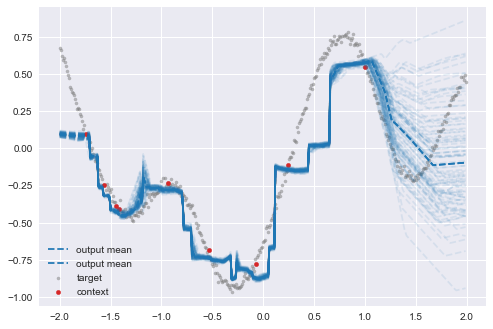

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

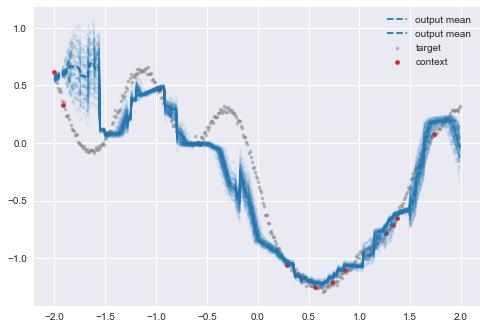

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

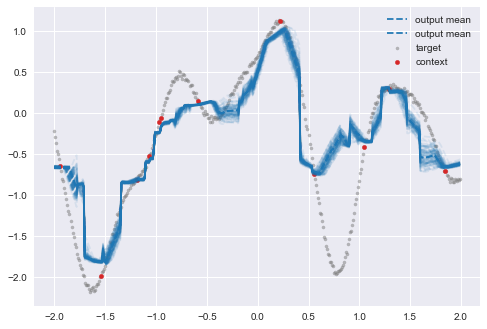

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

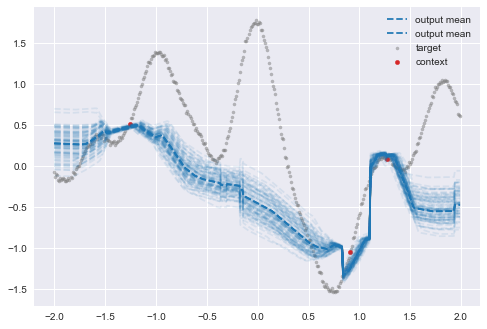

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

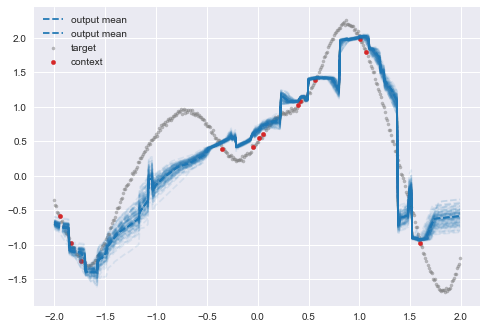

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

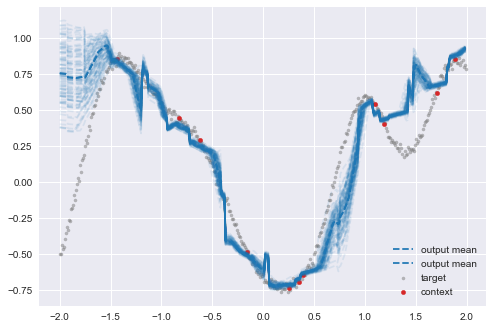

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

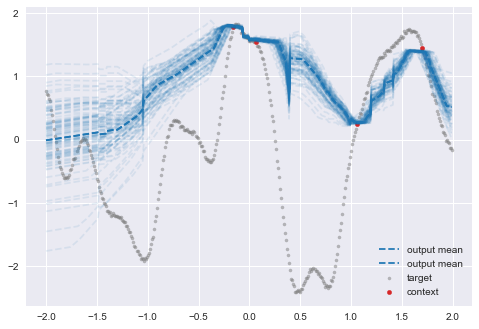

In [17]:
net_1 = models.ANP(
    deterministic_encoder=deterministic_encoder,
    latent_encoder=latent_encoder,
    decoder=decoder,
    train_loader=train_loader,
    fixed_sigma=0.02
)
plot_test(net_1, random_kernel_parameters=True)

for _ in range(13):
    trainer = pl.Trainer(max_steps=5000, checkpoint_callback=None)
    trainer.fit(net_1)

    plot_test(net_1, random_kernel_parameters=True)
    
for _ in range(6):
    trainer = pl.Trainer(max_steps=10000, checkpoint_callback=None)
    trainer.fit(net_1)

    plot_test(net_1, random_kernel_parameters=True)

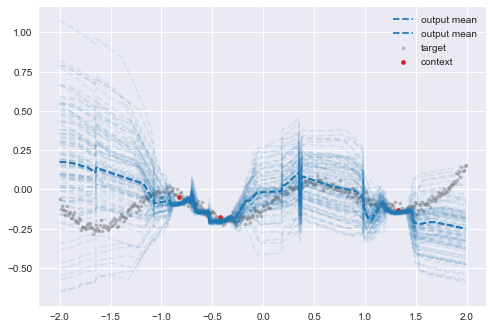

In [34]:
plot_test(net_1, random_kernel_parameters=True)

In [35]:
torch.save(net_1.state_dict(), "train_anp__net_1.weights")

#  Randomized kernel parameters and inferred sigma

In [8]:
latent_dim = 128
latent_encoder_infer_sigma = encoders.Latent(
    encoder_net=base.MLP(input_size=2, output_sizes=[128, 128, 128]),
    latent_params_net=base.MLP(input_size=128, output_sizes=[128, 2 * latent_dim]),
)

deterministic_encoder_infer_sigma = encoders.Deterministic(
    input_size=2,
    output_sizes=[128, 128, 128],
    attention=attention.Multihead(
        key_mlp=base.MLP(input_size=1, output_sizes=[128, latent_dim]),
        representation_size=128,
        num_heads=8,
    ),
)

decoder_infer_sigma = decoders.Decoder(input_size=latent_dim * 2 + 1, output_sizes=[128, 128, 2])

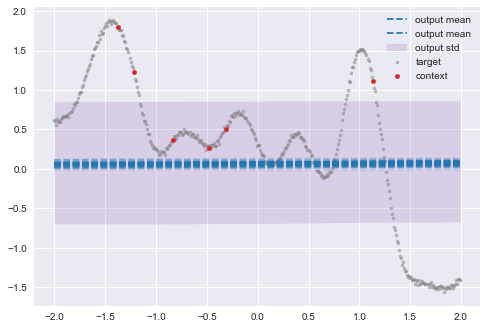

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


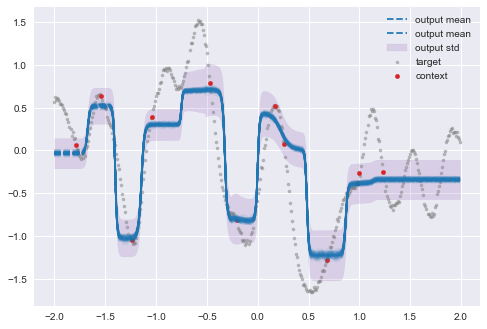

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


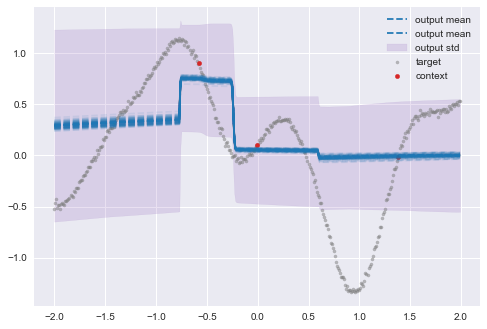

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


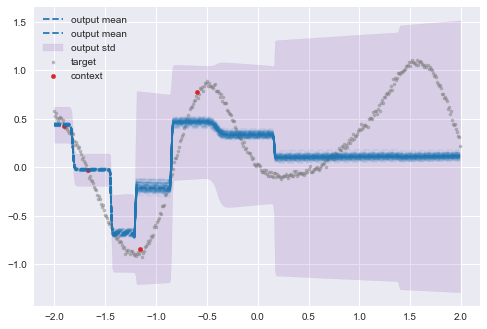

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


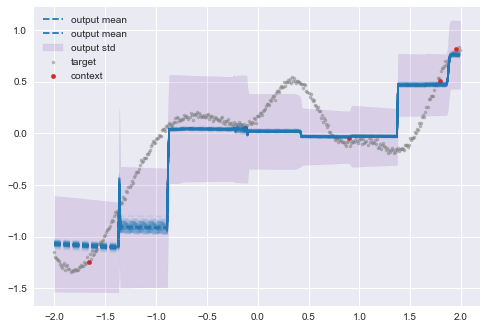

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


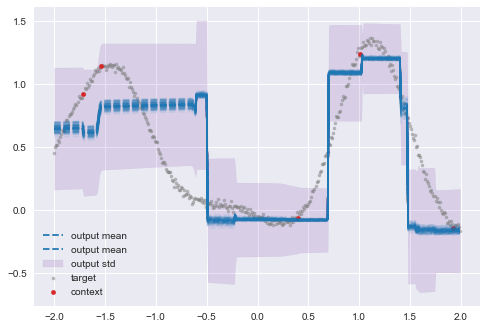

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


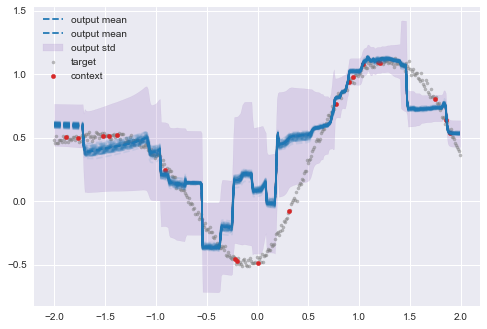

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


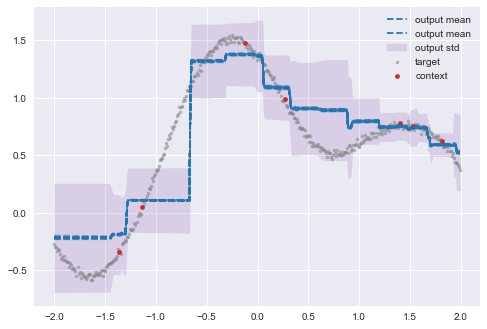

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


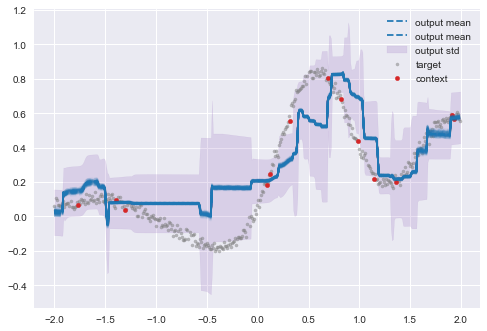

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


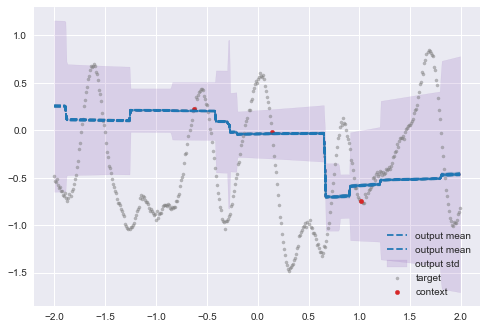

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


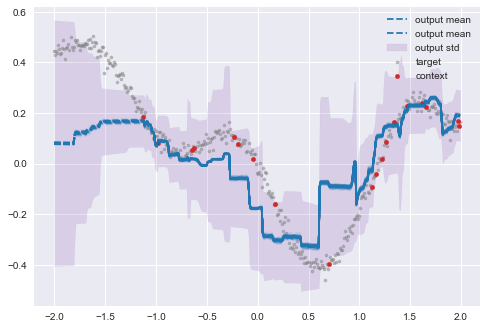

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


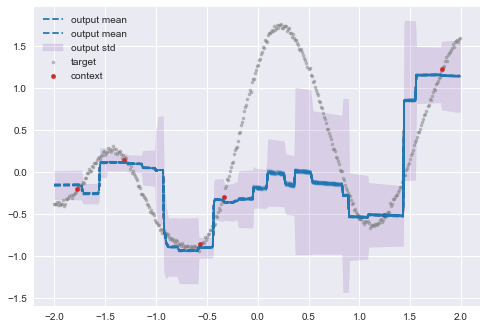

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


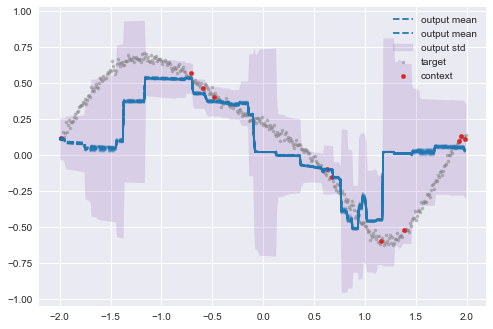

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


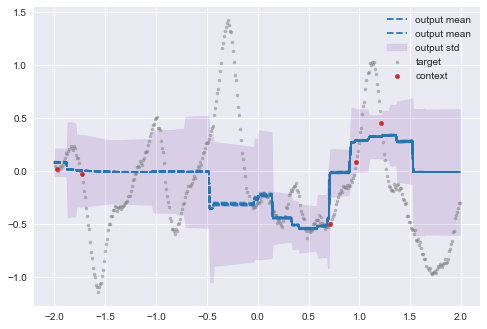

In [9]:
net_infer_sigma = models.ANP(
    
    deterministic_encoder=deterministic_encoder_infer_sigma,
    latent_encoder=latent_encoder_infer_sigma,
    decoder=decoder_infer_sigma,
    train_loader=train_loader,
)
plot_test(net_infer_sigma, random_kernel_parameters=True)

for _ in range(13):
    trainer = pl.Trainer(max_steps=5000)
    trainer.fit(net_infer_sigma)

    plot_test(net_infer_sigma, random_kernel_parameters=True)

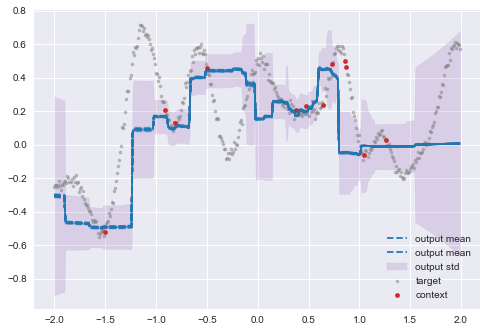

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


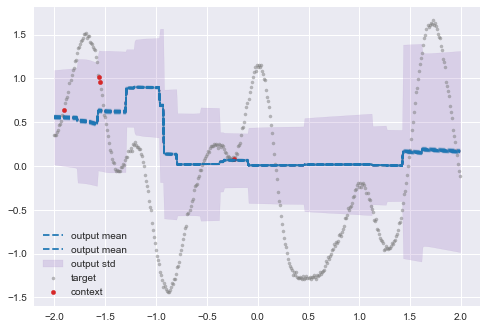

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


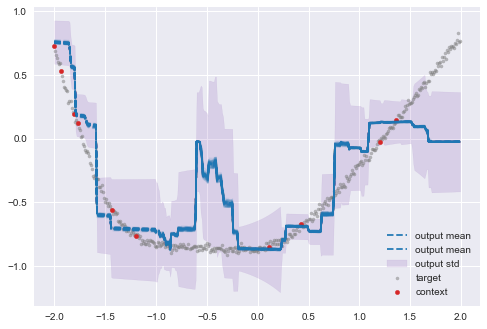

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


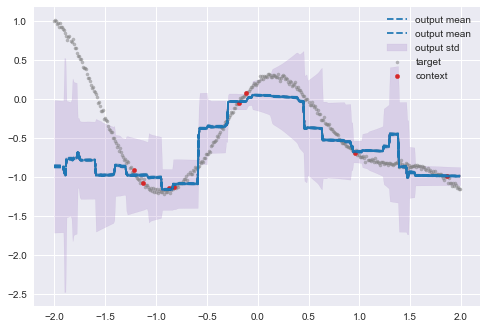

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


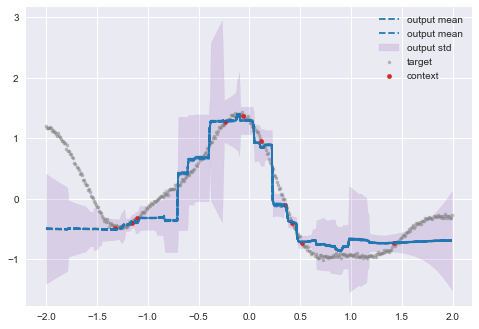

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


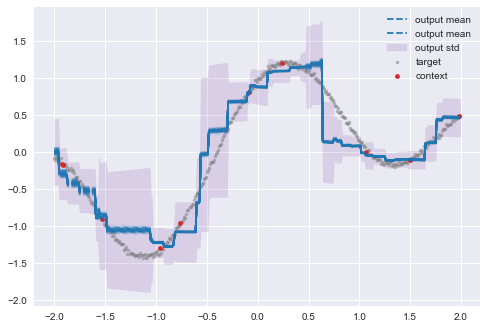

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


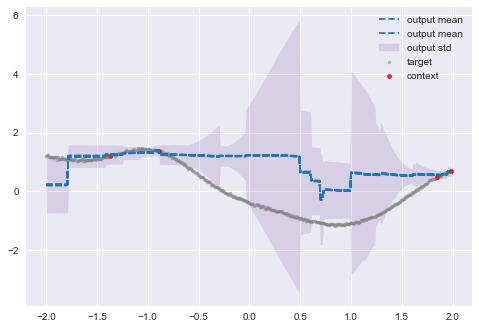

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


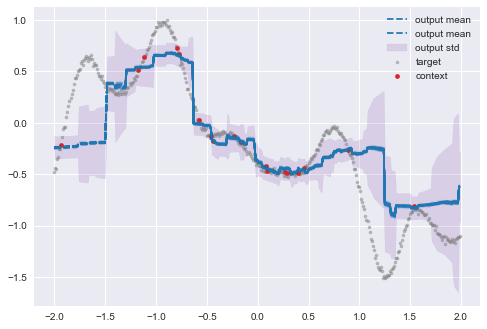

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


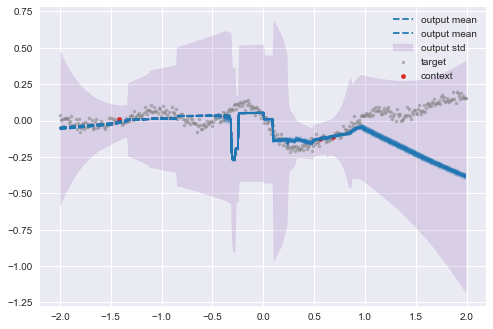

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


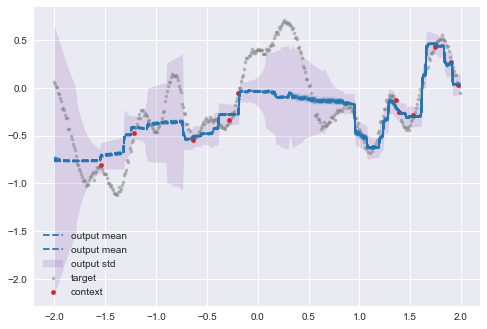

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


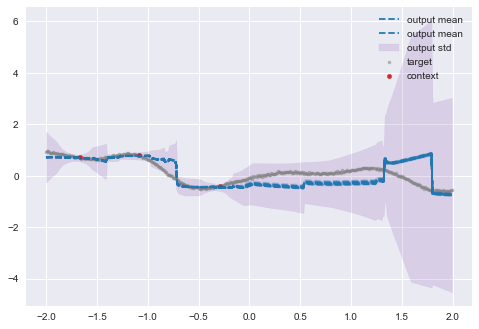

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


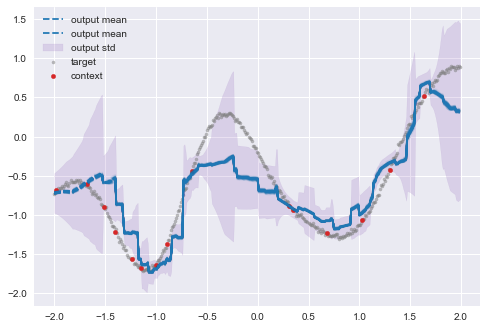

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


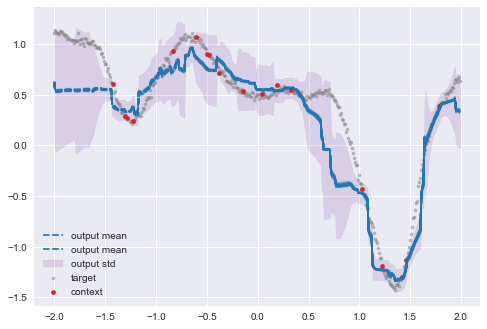

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


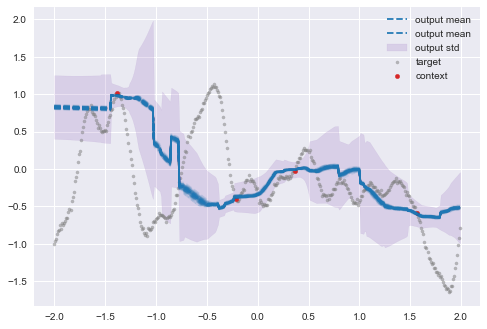

In [10]:
net_infer_sigma = models.ANP(
    
    deterministic_encoder=deterministic_encoder_infer_sigma,
    latent_encoder=latent_encoder_infer_sigma,
    decoder=decoder_infer_sigma,
    train_loader=train_loader,
)
plot_test(net_infer_sigma, random_kernel_parameters=True)

for _ in range(13):
    trainer = pl.Trainer(max_steps=5000)
    trainer.fit(net_infer_sigma)

    plot_test(net_infer_sigma, random_kernel_parameters=True)

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


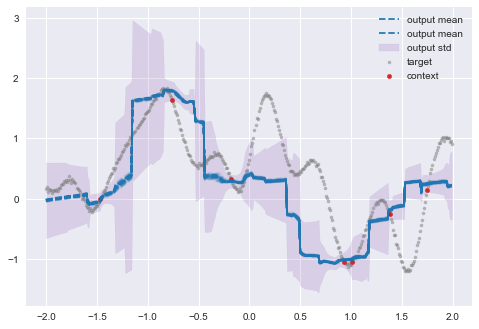

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


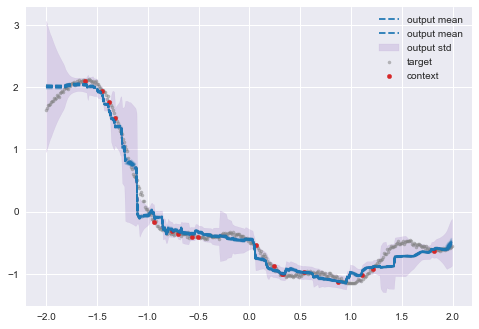

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


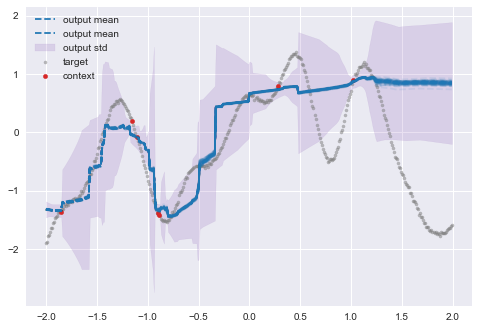

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


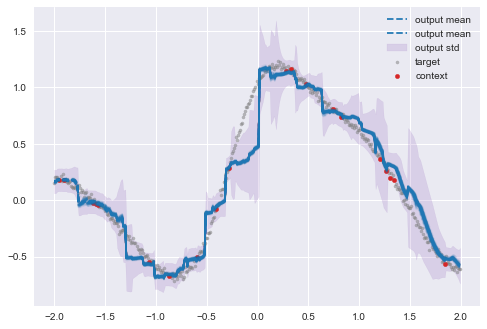

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


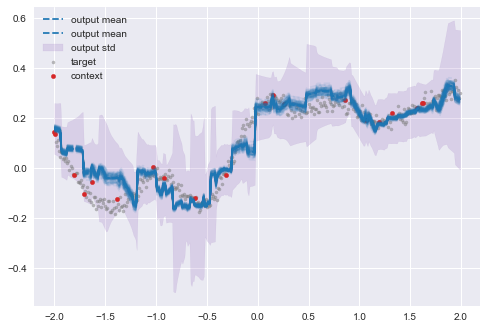

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name                                            | Type          | Params
------------------------------------------------------------------------------
0  | deterministic_encoder                           | Deterministic | 115 K 
1  | deterministic_encoder.mlp                       | MLP           | 33 K  
2  | deterministic_encoder.mlp.initial               | Linear        | 384   
3  | deterministic_encoder.mlp.hidden                | ModuleList    | 16 K  
4  | deterministic_encoder.mlp.hidden.0              | Linear        | 16 K  
5  | deterministic_encoder.mlp.final                 | Linear        | 16 K  
6  | deterministic_encoder.attention                 | Multihead     | 82 K  
7  | deterministic_encoder.attention.key_mlp         | MLP           | 16 K  
8  | deterministic_encoder.attention.key_mlp.initial | Linear        | 256   
9  | deterministic_encoder.attention.key_mlp.hidd

/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


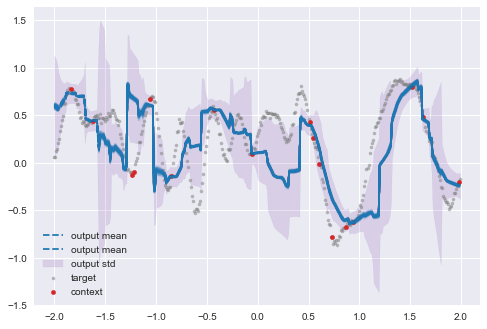

In [11]:
for _ in range(6):
    trainer = pl.Trainer(max_steps=10000)
    trainer.fit(net_infer_sigma)

    plot_test(net_infer_sigma, random_kernel_parameters=True)

In [12]:
torch.save(net_infer_sigma.state_dict(), "train_np__net_2.weights")

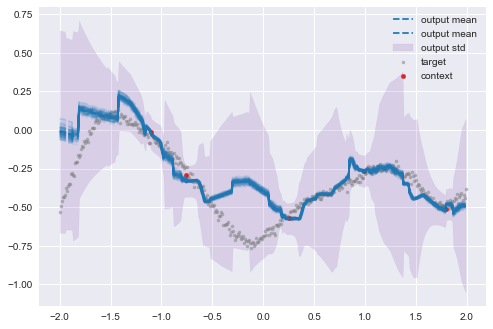

In [13]:
plot_test(net_infer_sigma, random_kernel_parameters=True)

The model here doesn't seem to use the latent variable for much, instead using the output sigma too encode the variance.